<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/sl/23_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Preprocessing danych:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Podział na zbiór treningowy i testowy](#3)
5. [Wizualizacja zbioru treningowego i testowego](#4)
6. [Niedouczenie - Regresja Logistyczna](#5)
7. [Niedouczenie - Drzewa Decyzyjne](#6)
8. [Przykład przeuczenia](#7)
9. [Walidacja krzyżowa](#8)
10. [Wybór optymalnych hiperparametrów - Grid Search](#9)


### <a name='0'></a> Import bibliotek

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='1'></a> Wygenerowanie danych

In [2]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]

[0 1 1 0 0]


In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


### <a name='2'></a> Wizualizacja danych

In [4]:
px.scatter(df, x='x1', y='x2', color='target', width=800, height=500)

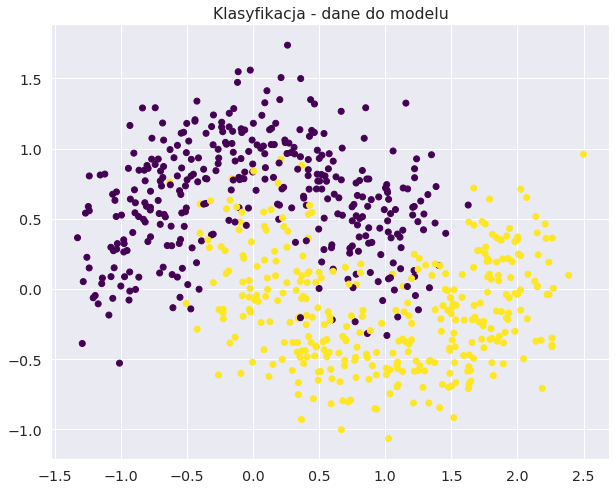

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

### <a name='3'></a> Podział na zbiór treningowy i testowy

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


### <a name='4'></a> Wizualizacja zbioru treningowego i testowego

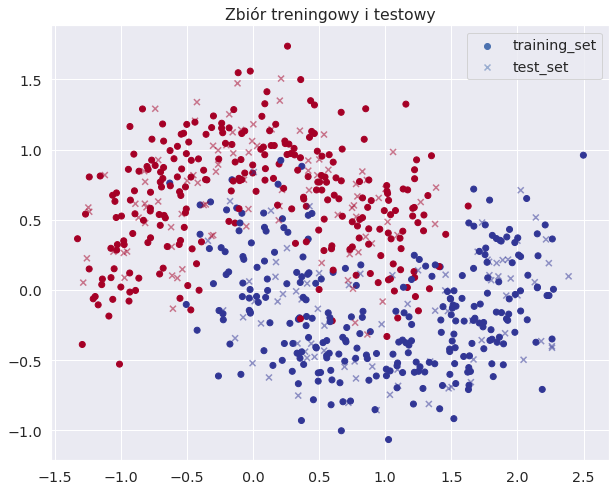

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

### <a name='5'></a> Niedouczenie - Regresja Logistyczna

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Zbiór treningowy

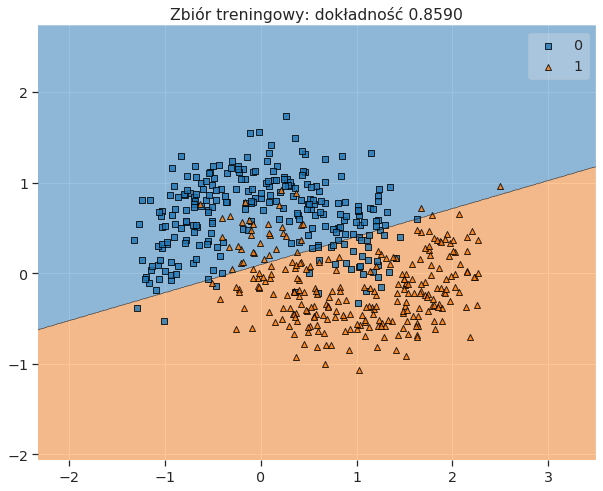

In [9]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

Zbiór testowy

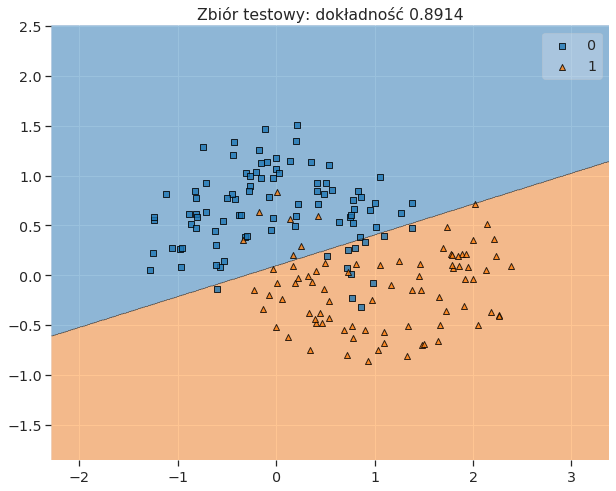

In [10]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='6'></a> Niedouczenie - Drzewa Decyzyjne

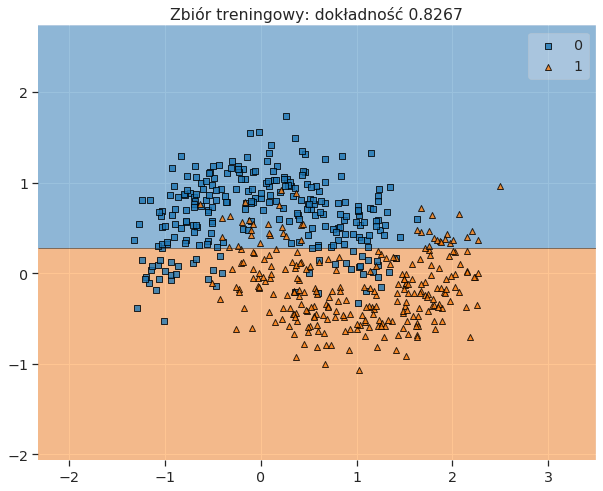

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

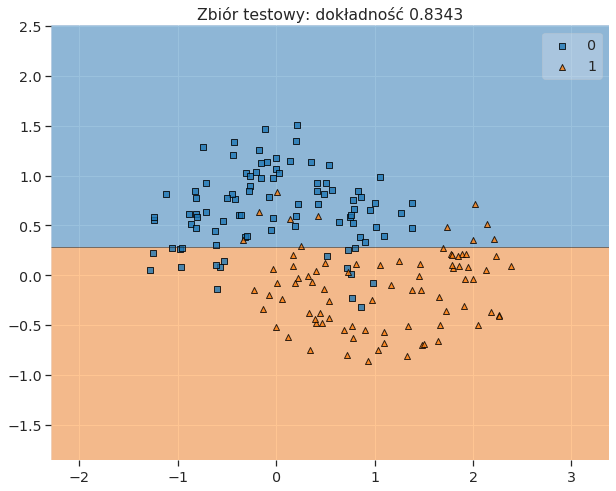

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='7'></a> Przykład przeuczenia

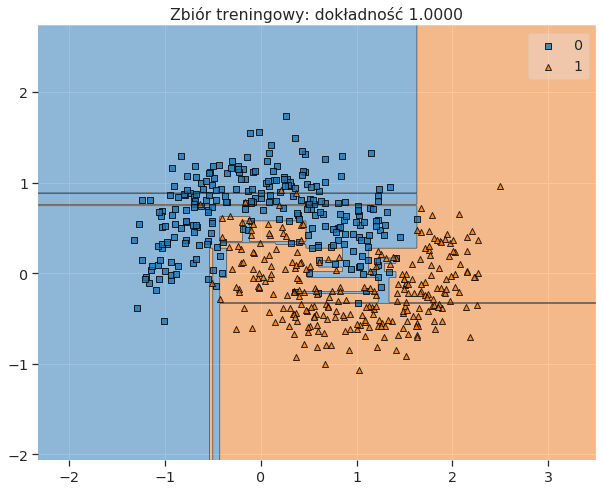

In [13]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

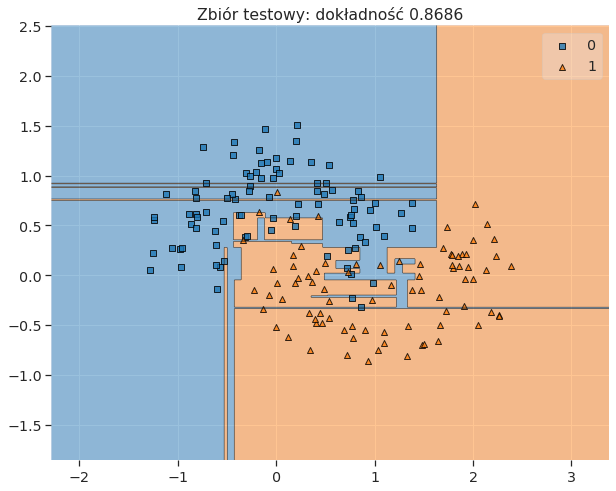

In [14]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='8'></a>Walidacja krzyżowa

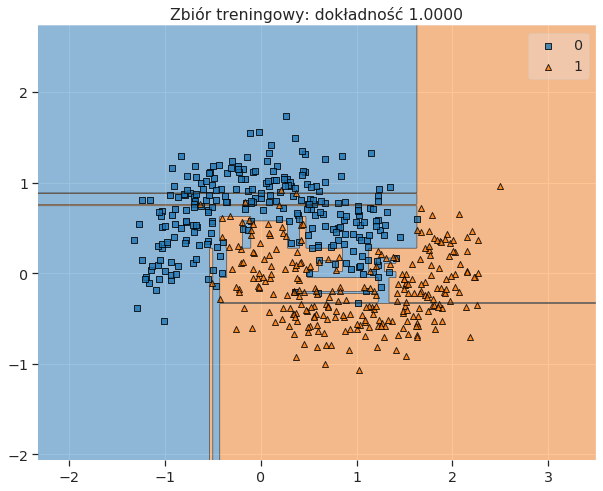

In [15]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

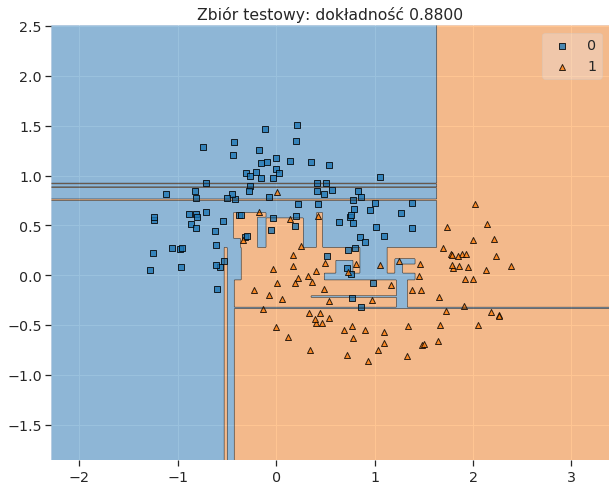

In [16]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier()

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
scores

array([0.86792453, 0.88679245, 0.9245283 , 0.94339623, 0.96226415,
       0.88461538, 0.94230769, 0.96153846, 0.80769231, 0.88461538])

In [18]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9066 (+/- 0.0466)


In [19]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.90384615, 0.88461538])

In [20]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9219 (+/- 0.0344)


In [21]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.867925
1,0.886792
2,0.943396
3,0.924528
4,0.981132
5,0.923077
6,0.942308
7,0.961538
8,0.903846
9,0.884615


In [22]:
scores.min()[0]

0.8679245283018868

In [23]:
px.bar(scores, y='accuracy', color='accuracy', width=800, height=500, title=f'Walidacja krzyżowa (10 podziałów) | Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])

### <a name='9'></a> Wybór optymalnych hiperparametrów - Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [25]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

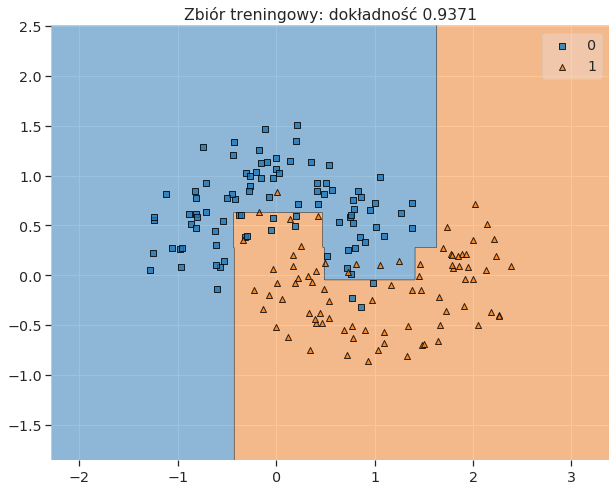

In [26]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

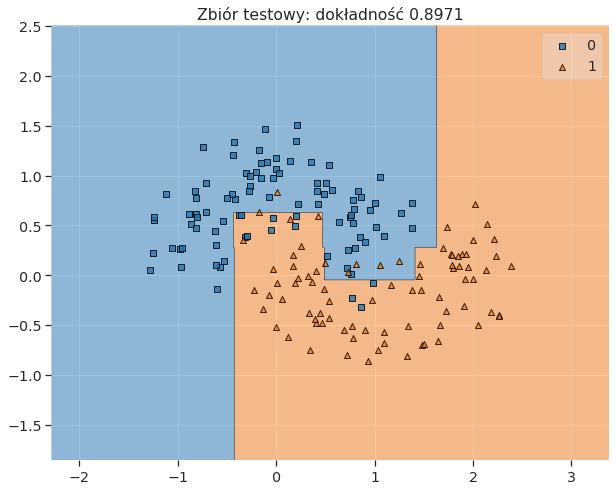

In [27]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': np.arange(1, 10), 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [29]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8}

In [30]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

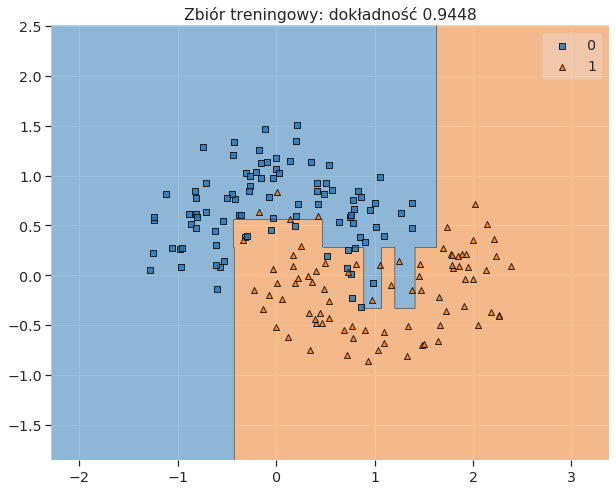

In [31]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

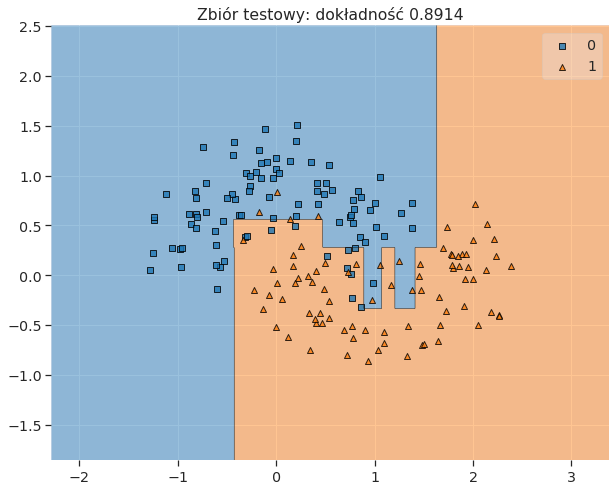

In [32]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [33]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
    {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5]}              
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
  

In [34]:
grid_search.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 4}

In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'n_estimators': [100]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [37]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 8,
 'n_estimators': 100}

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.9429')

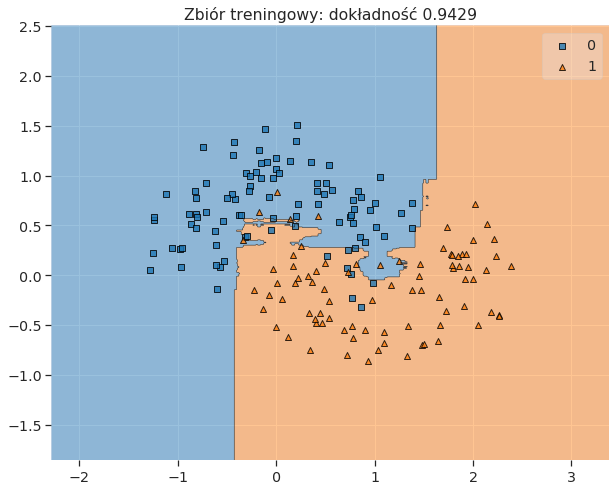

In [38]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.8914')

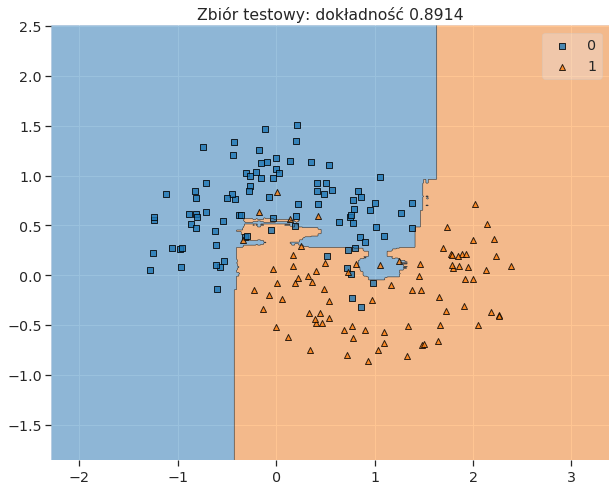

In [39]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')